### Question 13 (a) Run the next few cells (before part b) to get the regression of price on lot size.

In [1]:
# Importing libraries needed
import numpy as np  # for matrices, array, linear algebra
import pandas as pd  # open source data analysis and manipulation

In [2]:
# Importing the Dataset
Newton=pd.read_csv("Houses.csv")

In [3]:
# Display the shape and column names of our dataset
names = list(Newton) # this gives us a list of column names
print("Our datasets has dimensions", Newton.shape, "with columns", names)

Our datasets has dimensions (58, 5) with columns ['LIVING_AREA', 'LOT_SIZE', 'BEDROOMS', 'YEAR_BUILT', 'PRICE']


In [4]:
# Regression using the Normal Equation (X.T*X)*theta = (X.T*y)
Xdata=Newton.LOT_SIZE.values.reshape(-1, 1) # Feature variable is LOT_SIZE
Y=Newton.PRICE.values.reshape(-1, 1) # Output variable
X = np.vstack([np.ones(Xdata.shape[0]),Xdata.T]).T  # First, concatenate X with a column of ones on the left
print("The shape of X is", X.shape, "and the shape of Y is", Y.shape)
theta=(np.linalg.solve(np.matmul(X.T,X),np.matmul(X.T,Y)))
print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0])
print("Mean RSS = ",np.linalg.norm(np.matmul(X,theta) - Y)**2/Newton.shape[0])

The shape of X is (58, 2) and the shape of Y is (58, 1)
Least square solution: theta_0= 634551.3696294398 , theta_1= 75.58829406796347
Mean RSS =  311227054704.3907


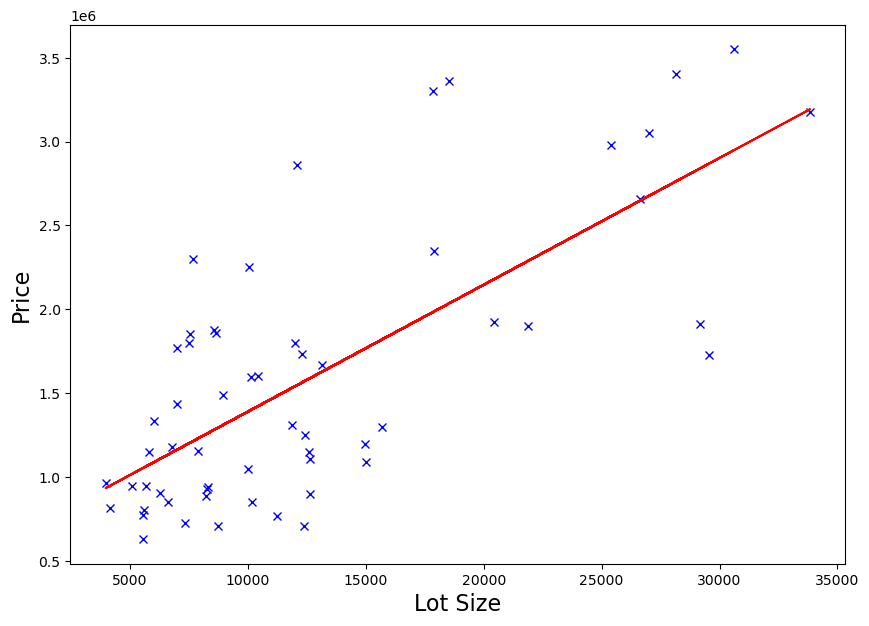

In [5]:
# Plotting data and regression line

%matplotlib inline
import matplotlib.pyplot as plt

Y_pred = np.matmul(X,theta)  # calculating the regression line

fig, ax = plt.subplots()  # ax refers to the picture, fig refers to an invisible container around it
fig.set_size_inches(10, 7) 

ax.set_xlabel("Lot Size", fontsize=16)
ax.set_ylabel("Price", fontsize=16)

ax.plot(Xdata,Y,'x',color='Blue')  # scatter plot of data
plt.plot(Xdata,Y_pred, color='red') # regression line

plt.show()

### Question 13 (b) Write code to do regression of price on living area and give a plot like above.

In [6]:
# Regression using the Normal Equation (X.T*X)*theta = (X.T*y)
X_la_data=Newton.LIVING_AREA.values.reshape(-1, 1) # Feature variable is LIVING_AREA
Y_la=Newton.PRICE.values.reshape(-1, 1) # Output variable
X_la = np.vstack([np.ones(X_la_data.shape[0]),X_la_data.T]).T  # First, concatenate X with a column of ones on the left
print("The shape of X is", X_la.shape, "and the shape of Y is", Y_la.shape)
theta=(np.linalg.solve(np.matmul(X_la.T,X_la),np.matmul(X_la.T,Y_la)))
print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0])
print("Mean RSS = ",np.linalg.norm(np.matmul(X,theta) - Y)**2/Newton.shape[0])

The shape of X is (58, 2) and the shape of Y is (58, 1)
Least square solution: theta_0= 62067.05530498321 , theta_1= 460.3667480783538
Mean RSS =  27485018194091.65


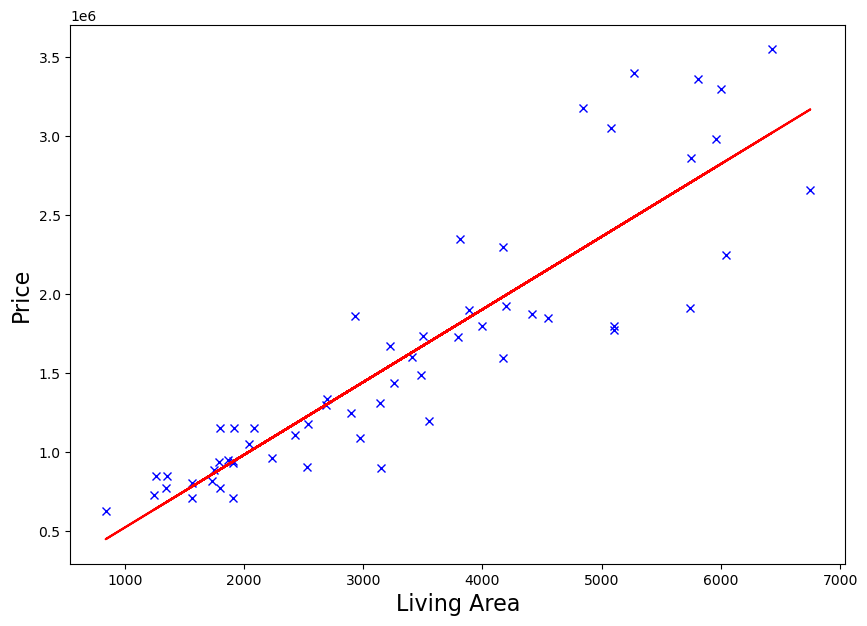

In [7]:
# Plotting data and regression line

Y_la_pred = np.matmul(X_la,theta)  # calculating the regression line

fig, ax = plt.subplots()  # ax refers to the picture, fig refers to an invisible container around it
fig.set_size_inches(10, 7) 

ax.set_xlabel("Living Area", fontsize=16)
ax.set_ylabel("Price", fontsize=16)

ax.plot(X_la_data,Y_la,'x',color='Blue')  # scatter plot of data
plt.plot(X_la_data,Y_la_pred, color='red') # regression line

plt.show()

### Question 13 (c) Run the next two cells (before part d) to get regression of price on two feature variables: living area and lot size lot size. You will get a picture too.

In [8]:
X1=Newton.LIVING_AREA.values.reshape(-1, 1) # We use two feature variables LIVING_AREA and LOT_SIZE
X2=Newton.LOT_SIZE.values.reshape(-1, 1)
Xdata = np.array([X1[:,0],X2[:,0]]).T #put the two columns together

Y=Newton.PRICE.values.reshape(-1, 1)

X = np.vstack([np.ones(Xdata.shape[0]),Xdata.T]).T  # Concatenate Xdata with a column of ones on the left

print("The shape of X is", X.shape, "and the shape of Y is", Y.shape)

theta=np.linalg.solve(np.matmul(X.T,X),np.matmul(X.T,Y))  # Solve the Normal Equation (X.T*X)*theta = (X.T*y)

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0], ", theta_2=", theta[2][0])
print("Mean RSS = ",np.linalg.norm(np.matmul(X,theta) - Y)**2/Newton.shape[0])

The shape of X is (58, 3) and the shape of Y is (58, 1)
Least square solution: theta_0= 9662.053547745656 , theta_1= 383.41973203101327 , theta_2= 24.28582034984721
Mean RSS =  105204207833.34949


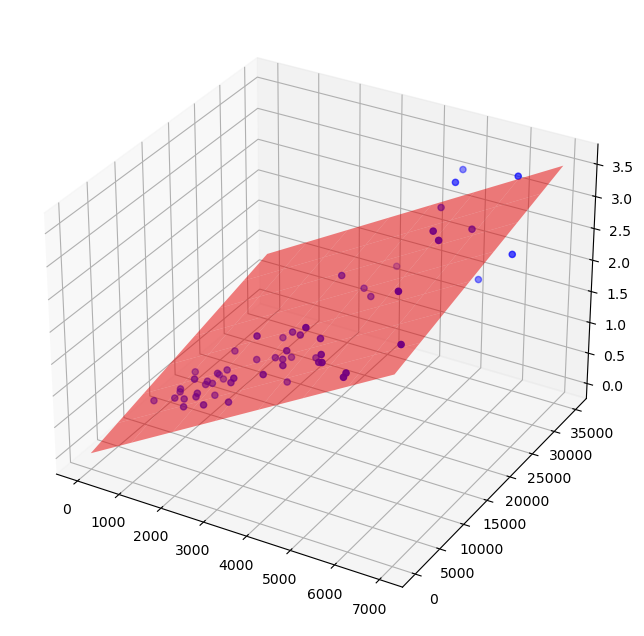

In [9]:
# calculate the regression plane (graph of the predictor function)

xx, yy = np.meshgrid(range(0, 8000, 1000),range(0, 40000, 5000))
x = np.array([xx.flatten(),yy.flatten()])
dx = np.vstack([np.ones(xx.flatten().shape[0]),xx.flatten(), yy.flatten()])
y_p = np.matmul(dx.T,theta)

# plot the data and the regression plane 

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter3D(X1, X2, Y, zdir='z', s=20, color='Blue')
ax.plot_surface(xx, yy, y_p.reshape((8,8)), alpha=0.5,color='red')

plt.show()

### Question 13 (d) Write code to do regression of price on living area and bedrooms, and give a plot like above.

In [10]:
X2_new=Newton.BEDROOMS.values.reshape(-1, 1)
Xdata_new = np.array([X1[:,0],X2_new[:,0]]).T #put the two columns together

Y_new=Newton.PRICE.values.reshape(-1, 1)

X_new = np.vstack([np.ones(Xdata_new.shape[0]),Xdata_new.T]).T  # Concatenate Xdata with a column of ones on the left

print("The shape of X is", X_new.shape, "and the shape of Y is", Y_new.shape)

theta=np.linalg.solve(np.matmul(X_new.T,X_new),np.matmul(X_new.T,Y_new))  # Solve the Normal Equation (X.T*X)*theta = (X.T*y)

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0], ", theta_2=", theta[2][0])
print("Mean RSS = ",np.linalg.norm(np.matmul(X_new,theta) - Y_new)**2/Newton.shape[0])

The shape of X is (58, 3) and the shape of Y is (58, 1)
Least square solution: theta_0= 14743.550080229497 , theta_1= 447.4222766037613 , theta_2= 21064.83253819663
Mean RSS =  124449800607.18555


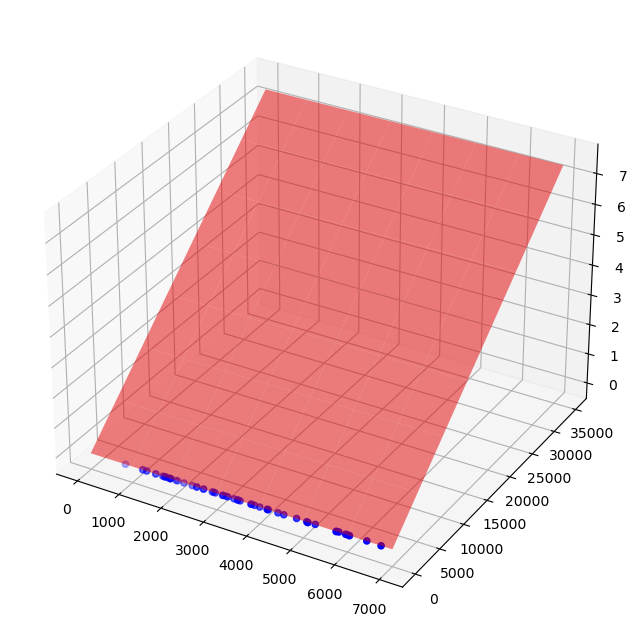

In [11]:
# calculate the regression plane (graph of the predictor function)

xx, yy = np.meshgrid(range(0, 8000, 1000),range(0, 40000, 5000))
x = np.array([xx.flatten(),yy.flatten()])
dx = np.vstack([np.ones(xx.flatten().shape[0]),xx.flatten(), yy.flatten()])
y_p = np.matmul(dx.T,theta)

# plot the data and the regression plane 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter3D(X1, X2_new, Y_new, zdir='z', s=20, color='Blue')
ax.plot_surface(xx, yy, y_p.reshape((8,8)), alpha=0.5,color='red')

plt.show()

### Question 13 (e)   Write code to do regression of price on living area, lot size, and bedrooms, calculate the mean RSS, and make a comment on the mean RSS compared to earlier errors. No need to plot (it's a picture in 4 dimensions!)

In [12]:
X1=Newton.LIVING_AREA.values.reshape(-1, 1) # We use three feature variables LIVING_AREA, LOT_SIZE, and BEDROOMS
X2=Newton.LOT_SIZE.values.reshape(-1, 1)
X3=Newton.BEDROOMS.values.reshape(-1, 1)
Xdata = np.array([X1[:,0],X2[:,0],X3[:,0]]).T #put the three columns together

Y=Newton.PRICE.values.reshape(-1, 1)

X = np.vstack([np.ones(Xdata.shape[0]),Xdata.T]).T  # Concatenate Xdata with a column of ones on the left

print("The shape of X is", X.shape, "and the shape of Y is", Y.shape)

theta=np.linalg.solve(np.matmul(X.T,X),np.matmul(X.T,Y))  # Solve the Normal Equation (X.T*X)*theta = (X.T*y)

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0], ", theta_2=", theta[2][0])
print("Mean RSS = ",np.linalg.norm(np.matmul(X,theta) - Y)**2/Newton.shape[0])

The shape of X is (58, 4) and the shape of Y is (58, 1)
Least square solution: theta_0= -23033.65560528892 , theta_1= 374.69898831888975 , theta_2= 24.199493437392537
Mean RSS =  105046607024.31778
